# Bitcoin Prediction Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel(r"C:\Users\hp\Desktop\New folder\Python Object and Data Structure Basics\csv file\All Files\All Files\Bitcoin_dataset.xlsx")
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [3]:
data.columns

Index(['Date', 'btc_market_price', 'btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')

In [4]:
data.shape

(2906, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [6]:
data.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344352e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866841e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.270000e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


In [7]:
data.dtypes

Date                                                    object
btc_market_price                                       float64
btc_total_bitcoins                                     float64
btc_market_cap                                         float64
btc_trade_volume                                       float64
btc_blocks_size                                        float64
btc_avg_block_size                                     float64
btc_n_orphaned_blocks                                    int64
btc_n_transactions_per_block                           float64
btc_median_confirmation_time                           float64
btc_hash_rate                                          float64
btc_difficulty                                         float64
btc_miners_revenue                                     float64
btc_transaction_fees                                   float64
btc_cost_per_transaction_percent                       float64
btc_cost_per_transaction                               

In [8]:
data.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

In [9]:
#filling missing value with mean
data['btc_total_bitcoins']= data['btc_total_bitcoins'].fillna(data.btc_total_bitcoins.mean())
data['btc_trade_volume']= data['btc_trade_volume'].fillna(data.btc_trade_volume.mean())
data['btc_blocks_size']= data['btc_blocks_size'].fillna(data.btc_blocks_size.mean())
data['btc_median_confirmation_time']= data['btc_median_confirmation_time'].fillna(data.btc_median_confirmation_time.mean())
data['btc_difficulty']= data['btc_difficulty'].fillna(data.btc_difficulty.mean())
data['btc_transaction_fees']= data['btc_transaction_fees'].fillna(data.btc_transaction_fees.mean())

In [10]:
data.isnull().sum()

Date                                                   0
btc_market_price                                       0
btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions             

In [11]:
data = data.drop('Date', axis= 1)
data.head()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,0.000029,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,0.000029,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,0.000023,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,0.000028,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,0.000027,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [12]:
#check is which feature is max corelated with dependent feature i.e btc_market_price
data.corr()['btc_market_price'].sort_values(ascending=False)

btc_market_price                                       1.000000
btc_market_cap                                         0.999783
btc_miners_revenue                                     0.986732
btc_estimated_transaction_volume_usd                   0.968308
btc_hash_rate                                          0.920876
btc_difficulty                                         0.916913
btc_trade_volume                                       0.868608
btc_cost_per_transaction                               0.815507
btc_transaction_fees                                   0.806568
btc_n_transactions_total                               0.680048
btc_blocks_size                                        0.674059
btc_n_unique_addresses                                 0.663917
btc_n_transactions                                     0.569603
btc_n_transactions_excluding_chains_longer_than_100    0.567281
btc_n_transactions_excluding_popular                   0.558416
btc_n_transactions_per_block            

<AxesSubplot:>

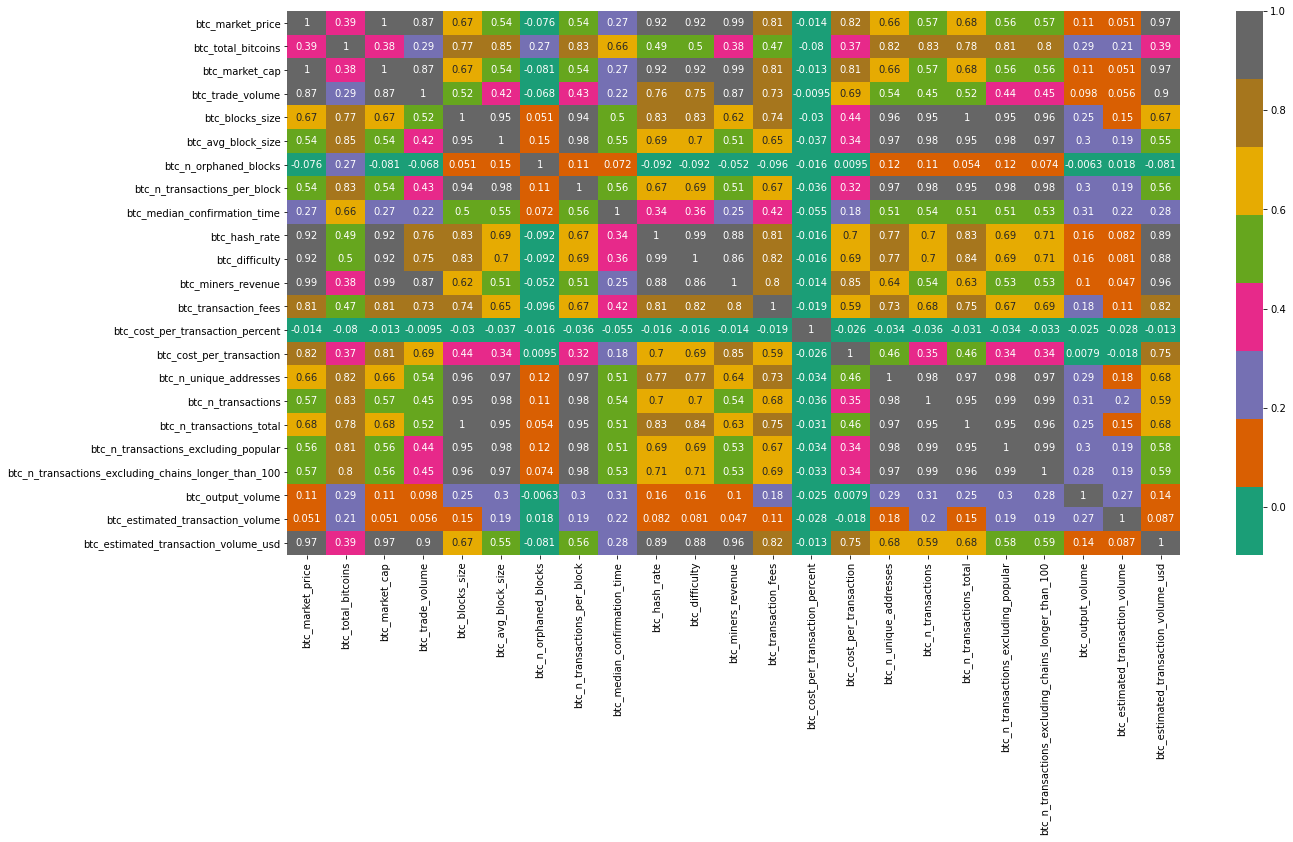

In [13]:
plt.figure(figsize= (20,10))
sns.heatmap(data.corr(), yticklabels= True, annot= True, cbar= True, cmap='Dark2')

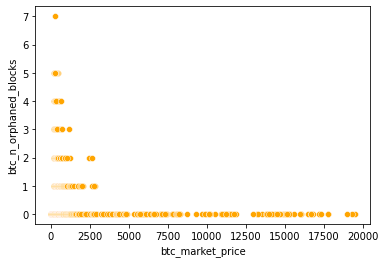

In [14]:
sns.scatterplot(data = data, x= 'btc_market_price', y = "btc_n_orphaned_blocks", color= 'orange');

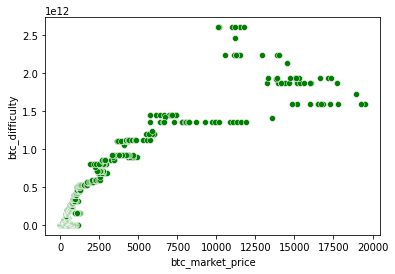

In [16]:
sns.scatterplot(data = data, x= 'btc_market_price', y = 'btc_difficulty', color= 'green');

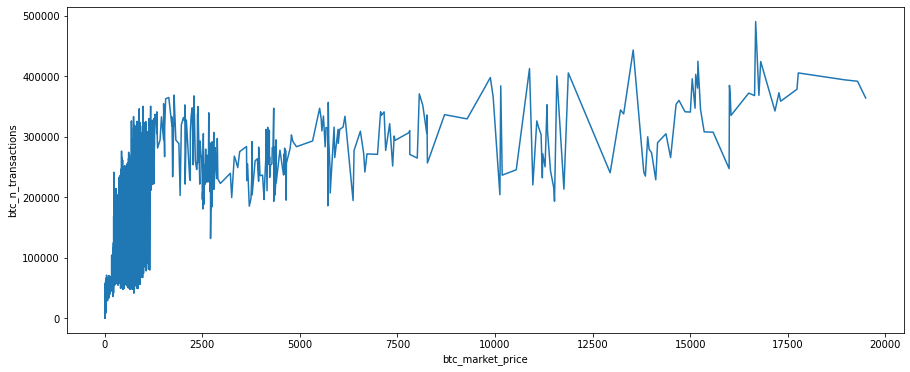

In [18]:
plt.figure(figsize= (15,6))
sns.lineplot(data= data, x= 'btc_market_price', y = 'btc_n_transactions');

Text(0.5, 1.0, 'Price Distribution')

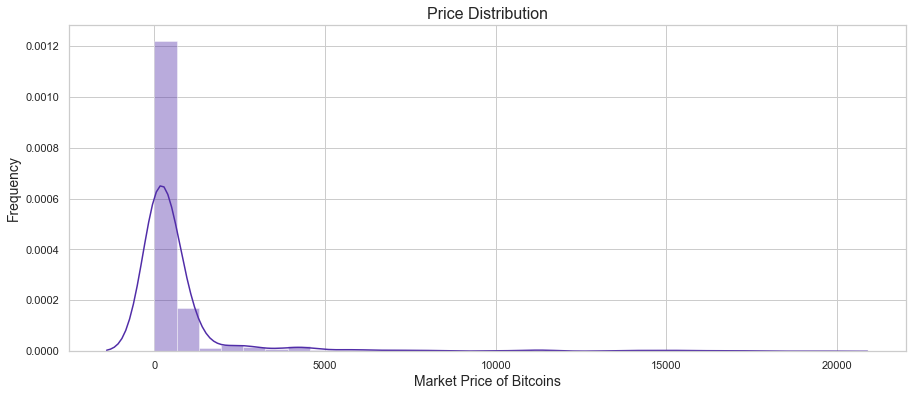

In [19]:
plt.figure(figsize= (15,6))
sns.set(style= "whitegrid")
sns.distplot(data['btc_market_price'], bins = 30, color= '#512DA8')
plt.ylabel('Frequency', fontsize= 14)
plt.xlabel('Market Price of Bitcoins', fontsize = 14)
plt.title("Price Distribution", fontsize= 16)

In [20]:
X = data.drop('btc_market_price', axis= 1)
Y = data['btc_market_price']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 92)


In [22]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2034, 22)
(872, 22)
(2034,)
(872,)


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression


In [26]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [27]:
Y_pred = lr.predict(X_test)
Y_pred

array([ 9.71423940e+12,  9.79634615e+09,  1.33174654e+14,  2.76521881e+11,
        1.82514604e+13,  2.21998985e+12,  3.31916452e+12,  2.85955715e+09,
        3.95021851e+12,  7.43080568e+12,  2.66766536e+13,  4.51922280e+09,
        2.45051993e+12,  9.26835663e+10, -1.23502185e+07,  3.29993698e+14,
        1.10302574e+13,  1.12836466e+11,  3.33276510e+12,  1.86268035e+13,
        1.02865066e+13,  1.69903747e+11,  1.66524020e+13,  3.01667050e+11,
        1.65901017e+11,  1.71442586e+13,  1.25728424e+13,  1.32487099e+13,
        4.69040825e+11,  2.03322494e+13,  1.94575785e+11,  5.77609940e+13,
        2.18801482e+13,  1.68137406e+13,  2.55745917e+11,  5.47906997e+10,
        2.48429309e+13,  2.63815192e+12,  1.72691826e+13,  3.99254878e+13,
        5.76199916e+10,  3.14825959e+11,  1.81589303e+13,  2.19139255e+13,
        1.56118729e+13,  2.36266446e+13,  1.87918632e+13,  3.78175857e+13,
       -1.64371682e+07,  3.41189027e+12,  1.87012532e+13,  2.45985766e+11,
        1.54761995e+13,  

In [28]:
Y_pred.shape

(872,)

In [29]:
from sklearn.metrics import mean_absolute_error, r2_score

In [30]:
mae, lr = mean_absolute_error, r2_score

In [32]:
mae_lr = mean_absolute_error(Y_pred, Y_test)
print('MAE for Linear Regression :', mae_lr)
r2_lr = r2_score(Y_pred, Y_test)
print('R2 SCORE for Linear Regression :', r2_lr)

MAE for Linear Regression : 32839722280452.16
R2 SCORE for Linear Regression : -0.11769531389203447


# Ridge Regression

In [33]:
from sklearn.linear_model import Ridge
rid_reg = Ridge(alpha= 100)
rid_reg.fit(X_train, Y_train)


Y_pred = rid_reg.predict(X_test)

mae_rg = mean_absolute_error(Y_pred, Y_test)
print("MSE for Ridge Regression :", mae_rg)
r2_rg = r2_score(Y_test, Y_pred)
print('R2 SCORE for Ridge Regression : ', r2_rg)

MSE for Ridge Regression : 48633529999960.68
R2 SCORE for Ridge Regression :  -2.9137615485182694e+21


# Lasso Regression

In [35]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha= 0.02)
ls.fit(X_train, Y_train)

Y_pred_ls = ls.predict(X_test)

mae_ls = mean_absolute_error(Y_pred_ls, Y_test)
print("MSE for Lasso Regression : ", mae_ls)
r2_ls = r2_score(Y_test, Y_pred_ls)
print('R2 Score for Lasso Regression : ', r2_ls)

MSE for Lasso Regression :  33752273327972.13
R2 Score for Lasso Regression :  -1.84127649169406e+21


# Deep Neural Network for regression

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(25, input_dim=X.shape[1], activation = 'relu'))#input layer 1
model.add(Dense(10, activation='relu')) #Hidden layer 2
model.add(Dense(8, activation = 'relu'))#Hidden Layer 3
model.add(Dense(5, activation = 'relu'))#Hidden Layer 4
model.add(Dense(1, activation = 'relu'))#Output layer
model.compile(loss= 'mean_absolute_error', optimizer = 'adam')
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs= 1000)

Epoch 1/1000
64/64 [==============================] - 2s 19ms/step - loss: 847.6164 - val_loss: 15181579264.0000
Epoch 2/1000
64/64 [==============================] - 0s 4ms/step - loss: 738.5821 - val_loss: 93098770432.0000
Epoch 3/1000
64/64 [==============================] - 0s 4ms/step - loss: 846.0253 - val_loss: 592665247744.0000
Epoch 4/1000
64/64 [==============================] - 0s 4ms/step - loss: 750.1185 - val_loss: 2869790507008.0000
Epoch 5/1000
64/64 [==============================] - 0s 4ms/step - loss: 715.0336 - val_loss: 8632888459264.0000
Epoch 6/1000
64/64 [==============================] - 0s 4ms/step - loss: 452.3687 - val_loss: 13753419563008.0000
Epoch 7/1000
64/64 [==============================] - 0s 4ms/step - loss: 390.2729 - val_loss: 20580428414976.0000
Epoch 8/1000
64/64 [==============================] - 0s 4ms/step - loss: 358.9632 - val_loss: 28677593104384.0000
Epoch 9/1000
64/64 [==============================] - 0s 4ms/step - loss: 247.7194 - val_

64/64 [==============================] - 0s 4ms/step - loss: 36.2481 - val_loss: 49713516642304.0000
Epoch 73/1000
64/64 [==============================] - 0s 4ms/step - loss: 32.6299 - val_loss: 50286747975680.0000
Epoch 74/1000
64/64 [==============================] - 0s 4ms/step - loss: 37.7339 - val_loss: 50488561106944.0000
Epoch 75/1000
64/64 [==============================] - 0s 4ms/step - loss: 39.7319 - val_loss: 49976415617024.0000
Epoch 76/1000
64/64 [==============================] - 0s 4ms/step - loss: 35.4608 - val_loss: 48814283030528.0000
Epoch 77/1000
64/64 [==============================] - 0s 4ms/step - loss: 36.6496 - val_loss: 49937832214528.0000
Epoch 78/1000
64/64 [==============================] - 0s 4ms/step - loss: 34.1023 - val_loss: 48907899895808.0000
Epoch 79/1000
64/64 [==============================] - 0s 4ms/step - loss: 32.3782 - val_loss: 48815079948288.0000
Epoch 80/1000
64/64 [==============================] - 0s 4ms/step - loss: 32.9122 - val_loss:

Epoch 143/1000
64/64 [==============================] - 0s 4ms/step - loss: 19.5571 - val_loss: 50784276316160.0000
Epoch 144/1000
64/64 [==============================] - 0s 4ms/step - loss: 19.2047 - val_loss: 50646002696192.0000
Epoch 145/1000
64/64 [==============================] - 0s 4ms/step - loss: 17.2850 - val_loss: 50765531971584.0000
Epoch 146/1000
64/64 [==============================] - 0s 4ms/step - loss: 17.9571 - val_loss: 50929017552896.0000
Epoch 147/1000
64/64 [==============================] - 0s 4ms/step - loss: 18.5281 - val_loss: 50920641527808.0000
Epoch 148/1000
64/64 [==============================] - 0s 4ms/step - loss: 18.5545 - val_loss: 51155581272064.0000
Epoch 149/1000
64/64 [==============================] - 0s 4ms/step - loss: 17.0865 - val_loss: 51685720326144.0000
Epoch 150/1000
64/64 [==============================] - 0s 4ms/step - loss: 19.3262 - val_loss: 51282693849088.0000
Epoch 151/1000
64/64 [==============================] - 0s 3ms/step - lo

64/64 [==============================] - 0s 7ms/step - loss: 13.9502 - val_loss: 56202809573376.0000
Epoch 214/1000
64/64 [==============================] - 0s 4ms/step - loss: 14.4849 - val_loss: 56229552455680.0000
Epoch 215/1000
64/64 [==============================] - 0s 4ms/step - loss: 13.3228 - val_loss: 56446079205376.0000
Epoch 216/1000
64/64 [==============================] - 0s 4ms/step - loss: 14.3528 - val_loss: 56205657505792.0000
Epoch 217/1000
64/64 [==============================] - 0s 4ms/step - loss: 16.9805 - val_loss: 56523417976832.0000
Epoch 218/1000
64/64 [==============================] - 0s 4ms/step - loss: 13.1005 - val_loss: 56497971134464.0000
Epoch 219/1000
64/64 [==============================] - 0s 4ms/step - loss: 13.6989 - val_loss: 56713759686656.0000
Epoch 220/1000
64/64 [==============================] - 0s 4ms/step - loss: 14.3411 - val_loss: 56504145149952.0000
Epoch 221/1000
64/64 [==============================] - 0s 4ms/step - loss: 14.9978 - v

64/64 [==============================] - 0s 4ms/step - loss: 11.0845 - val_loss: 59760032350208.0000
Epoch 284/1000
64/64 [==============================] - 0s 4ms/step - loss: 13.0933 - val_loss: 59857763827712.0000
Epoch 285/1000
64/64 [==============================] - 0s 4ms/step - loss: 11.4612 - val_loss: 59999149621248.0000
Epoch 286/1000
64/64 [==============================] - 0s 4ms/step - loss: 12.3327 - val_loss: 59894975692800.0000
Epoch 287/1000
64/64 [==============================] - 0s 4ms/step - loss: 12.5031 - val_loss: 60223221923840.0000
Epoch 288/1000
64/64 [==============================] - 0s 4ms/step - loss: 12.3734 - val_loss: 60371213746176.0000
Epoch 289/1000
64/64 [==============================] - 0s 4ms/step - loss: 13.3516 - val_loss: 60362862886912.0000
Epoch 290/1000
64/64 [==============================] - 0s 4ms/step - loss: 13.6055 - val_loss: 60080959520768.0000
Epoch 291/1000
64/64 [==============================] - 0s 4ms/step - loss: 11.5874 - v

Epoch 354/1000
64/64 [==============================] - 0s 4ms/step - loss: 10.2234 - val_loss: 63583736037376.0000
Epoch 355/1000
64/64 [==============================] - 0s 4ms/step - loss: 11.9667 - val_loss: 63508217593856.0000
Epoch 356/1000
64/64 [==============================] - 0s 4ms/step - loss: 11.4958 - val_loss: 63566459699200.0000
Epoch 357/1000
64/64 [==============================] - 0s 4ms/step - loss: 11.2068 - val_loss: 63666539986944.0000
Epoch 358/1000
64/64 [==============================] - 0s 4ms/step - loss: 10.6163 - val_loss: 64046682341376.0000
Epoch 359/1000
64/64 [==============================] - 0s 4ms/step - loss: 11.4422 - val_loss: 63735855054848.0000
Epoch 360/1000
64/64 [==============================] - 0s 4ms/step - loss: 10.6243 - val_loss: 63677042524160.0000
Epoch 361/1000
64/64 [==============================] - 0s 4ms/step - loss: 11.5795 - val_loss: 63630708047872.0000
Epoch 362/1000
64/64 [==============================] - 0s 3ms/step - lo

Epoch 425/1000
64/64 [==============================] - 0s 4ms/step - loss: 10.0022 - val_loss: 65604094525440.0000
Epoch 426/1000
64/64 [==============================] - 0s 4ms/step - loss: 9.1494 - val_loss: 65796864737280.0000
Epoch 427/1000
64/64 [==============================] - 0s 4ms/step - loss: 9.1857 - val_loss: 65600290291712.0000
Epoch 428/1000
64/64 [==============================] - 0s 4ms/step - loss: 10.3514 - val_loss: 66461519314944.0000
Epoch 429/1000
64/64 [==============================] - 0s 4ms/step - loss: 10.9301 - val_loss: 65867878498304.0000
Epoch 430/1000
64/64 [==============================] - 0s 4ms/step - loss: 10.0845 - val_loss: 65676014256128.0000
Epoch 431/1000
64/64 [==============================] - 0s 4ms/step - loss: 9.5491 - val_loss: 65855345917952.0000
Epoch 432/1000
64/64 [==============================] - 0s 4ms/step - loss: 9.4595 - val_loss: 65900514377728.0000
Epoch 433/1000
64/64 [==============================] - 0s 4ms/step - loss: 

Epoch 496/1000
64/64 [==============================] - 0s 4ms/step - loss: 9.9858 - val_loss: 66971672510464.0000
Epoch 497/1000
64/64 [==============================] - 0s 4ms/step - loss: 9.3234 - val_loss: 67614009196544.0000
Epoch 498/1000
64/64 [==============================] - 0s 4ms/step - loss: 10.9355 - val_loss: 67189038120960.0000
Epoch 499/1000
64/64 [==============================] - 0s 4ms/step - loss: 8.8573 - val_loss: 67433847062528.0000
Epoch 500/1000
64/64 [==============================] - 0s 6ms/step - loss: 9.3117 - val_loss: 67354448887808.0000
Epoch 501/1000
64/64 [==============================] - 0s 4ms/step - loss: 9.7179 - val_loss: 67048306638848.0000
Epoch 502/1000
64/64 [==============================] - 0s 4ms/step - loss: 9.5093 - val_loss: 67088861364224.0000
Epoch 503/1000
64/64 [==============================] - 0s 4ms/step - loss: 10.0042 - val_loss: 67459071606784.0000
Epoch 504/1000
64/64 [==============================] - 0s 4ms/step - loss: 9.

Epoch 567/1000
64/64 [==============================] - 0s 4ms/step - loss: 8.8081 - val_loss: 68292345593856.0000
Epoch 568/1000
64/64 [==============================] - 0s 4ms/step - loss: 8.9288 - val_loss: 68521195208704.0000
Epoch 569/1000
64/64 [==============================] - 0s 4ms/step - loss: 8.5906 - val_loss: 67943652130816.0000
Epoch 570/1000
64/64 [==============================] - 0s 4ms/step - loss: 10.8457 - val_loss: 68373190803456.0000
Epoch 571/1000
64/64 [==============================] - 0s 4ms/step - loss: 8.5310 - val_loss: 68736140705792.0000
Epoch 572/1000
64/64 [==============================] - 0s 3ms/step - loss: 9.1567 - val_loss: 68814867791872.0000
Epoch 573/1000
64/64 [==============================] - 0s 4ms/step - loss: 9.1755 - val_loss: 68236011896832.0000
Epoch 574/1000
64/64 [==============================] - 0s 4ms/step - loss: 10.6413 - val_loss: 68785608327168.0000
Epoch 575/1000
64/64 [==============================] - 0s 4ms/step - loss: 8.

Epoch 638/1000
64/64 [==============================] - 0s 4ms/step - loss: 9.8420 - val_loss: 69421385121792.0000
Epoch 639/1000
64/64 [==============================] - 0s 4ms/step - loss: 9.3744 - val_loss: 69197451231232.0000
Epoch 640/1000
64/64 [==============================] - 0s 4ms/step - loss: 8.1007 - val_loss: 69463412047872.0000
Epoch 641/1000
64/64 [==============================] - 0s 4ms/step - loss: 8.5307 - val_loss: 69473918779392.0000
Epoch 642/1000
64/64 [==============================] - 0s 4ms/step - loss: 8.7602 - val_loss: 69193483419648.0000
Epoch 643/1000
64/64 [==============================] - 0s 4ms/step - loss: 8.9742 - val_loss: 68888360386560.0000
Epoch 644/1000
64/64 [==============================] - 0s 4ms/step - loss: 8.3597 - val_loss: 69383271481344.0000
Epoch 645/1000
64/64 [==============================] - 0s 4ms/step - loss: 9.3963 - val_loss: 69142157721600.0000
Epoch 646/1000
64/64 [==============================] - 0s 4ms/step - loss: 8.39

64/64 [==============================] - 0s 4ms/step - loss: 8.0896 - val_loss: 69175301111808.0000
Epoch 710/1000
64/64 [==============================] - 0s 4ms/step - loss: 7.5937 - val_loss: 69067423612928.0000
Epoch 711/1000
64/64 [==============================] - 0s 4ms/step - loss: 7.4894 - val_loss: 69214970839040.0000
Epoch 712/1000
64/64 [==============================] - 0s 4ms/step - loss: 8.5865 - val_loss: 69193324036096.0000
Epoch 713/1000
64/64 [==============================] - 0s 4ms/step - loss: 8.4382 - val_loss: 69149980098560.0000
Epoch 714/1000
64/64 [==============================] - 0s 4ms/step - loss: 7.4947 - val_loss: 69401567035392.0000
Epoch 715/1000
64/64 [==============================] - 0s 4ms/step - loss: 7.7119 - val_loss: 69600301547520.0000
Epoch 716/1000
64/64 [==============================] - 0s 4ms/step - loss: 8.9202 - val_loss: 69396663894016.0000
Epoch 717/1000
64/64 [==============================] - 0s 4ms/step - loss: 9.7297 - val_loss: 

64/64 [==============================] - 0s 4ms/step - loss: 8.5203 - val_loss: 69731591651328.0000
Epoch 781/1000
64/64 [==============================] - 0s 4ms/step - loss: 7.2133 - val_loss: 70037192835072.0000
Epoch 782/1000
64/64 [==============================] - 0s 4ms/step - loss: 7.6009 - val_loss: 69665745272832.0000
Epoch 783/1000
64/64 [==============================] - 0s 4ms/step - loss: 10.4513 - val_loss: 70078473175040.0000
Epoch 784/1000
64/64 [==============================] - 0s 4ms/step - loss: 6.8702 - val_loss: 70175873302528.0000
Epoch 785/1000
64/64 [==============================] - 0s 4ms/step - loss: 7.4433 - val_loss: 69972197900288.0000
Epoch 786/1000
64/64 [==============================] - 0s 4ms/step - loss: 7.7583 - val_loss: 70189961969664.0000
Epoch 787/1000
64/64 [==============================] - 0s 4ms/step - loss: 8.1861 - val_loss: 70076153724928.0000
Epoch 788/1000
64/64 [==============================] - 0s 4ms/step - loss: 9.0109 - val_loss:

64/64 [==============================] - 0s 4ms/step - loss: 6.7261 - val_loss: 70676404764672.0000
Epoch 852/1000
64/64 [==============================] - 0s 4ms/step - loss: 8.0229 - val_loss: 70525032333312.0000
Epoch 853/1000
64/64 [==============================] - 0s 4ms/step - loss: 7.7661 - val_loss: 70699095949312.0000
Epoch 854/1000
64/64 [==============================] - 0s 4ms/step - loss: 8.1650 - val_loss: 70190729527296.0000
Epoch 855/1000
64/64 [==============================] - 0s 4ms/step - loss: 8.5260 - val_loss: 70622919000064.0000
Epoch 856/1000
64/64 [==============================] - 0s 4ms/step - loss: 7.2001 - val_loss: 70874635960320.0000
Epoch 857/1000
64/64 [==============================] - 0s 4ms/step - loss: 7.6752 - val_loss: 70844009152512.0000
Epoch 858/1000
64/64 [==============================] - 0s 4ms/step - loss: 6.7722 - val_loss: 70616342331392.0000
Epoch 859/1000
64/64 [==============================] - 0s 4ms/step - loss: 7.1027 - val_loss: 

64/64 [==============================] - 0s 4ms/step - loss: 7.6032 - val_loss: 71091355648000.0000
Epoch 923/1000
64/64 [==============================] - 0s 4ms/step - loss: 7.9369 - val_loss: 71019398168576.0000
Epoch 924/1000
64/64 [==============================] - 0s 6ms/step - loss: 6.9862 - val_loss: 71061349597184.0000
Epoch 925/1000
64/64 [==============================] - 0s 4ms/step - loss: 9.3152 - val_loss: 70968135385088.0000
Epoch 926/1000
64/64 [==============================] - 0s 3ms/step - loss: 8.1603 - val_loss: 71187380043776.0000
Epoch 927/1000
64/64 [==============================] - ETA: 0s - loss: 6.426 - 0s 4ms/step - loss: 6.4716 - val_loss: 70972287746048.0000
Epoch 928/1000
64/64 [==============================] - 0s 4ms/step - loss: 7.4937 - val_loss: 71141444026368.0000
Epoch 929/1000
64/64 [==============================] - 0s 4ms/step - loss: 7.0282 - val_loss: 70984627388416.0000
Epoch 930/1000
64/64 [==============================] - 0s 4ms/step - l

Epoch 993/1000
64/64 [==============================] - 0s 4ms/step - loss: 7.6114 - val_loss: 70739394822144.0000
Epoch 994/1000
64/64 [==============================] - 0s 4ms/step - loss: 6.7495 - val_loss: 70930235654144.0000
Epoch 995/1000
64/64 [==============================] - 0s 4ms/step - loss: 7.7574 - val_loss: 70554543456256.0000
Epoch 996/1000
64/64 [==============================] - 0s 4ms/step - loss: 7.0864 - val_loss: 70638580531200.0000
Epoch 997/1000
64/64 [==============================] - 0s 4ms/step - loss: 6.5574 - val_loss: 70660038590464.0000
Epoch 998/1000
64/64 [==============================] - 0s 4ms/step - loss: 8.2226 - val_loss: 70473215901696.0000
Epoch 999/1000
64/64 [==============================] - 0s 4ms/step - loss: 6.3470 - val_loss: 70452076609536.0000
Epoch 1000/1000
64/64 [==============================] - 0s 4ms/step - loss: 7.9909 - val_loss: 70792385658880.0000


In [37]:
Y_pred_net = model.predict(X_test)
Y_pred_net

array([[2.24777512e+13],
       [7.98195507e+09],
       [3.59284785e+14],
       [2.16507367e+11],
       [1.70407305e+13],
       [1.73595545e+12],
       [2.58359112e+12],
       [2.44122061e+09],
       [3.10271620e+12],
       [1.87768148e+13],
       [7.94734876e+13],
       [3.80841882e+09],
       [1.90901322e+12],
       [7.29565757e+10],
       [2.85960704e+08],
       [6.39907245e+14],
       [1.94174129e+13],
       [8.87778263e+10],
       [2.60767456e+12],
       [6.87715574e+13],
       [2.32120291e+13],
       [1.32694540e+11],
       [3.58151283e+13],
       [2.36264145e+11],
       [1.29869496e+11],
       [6.33789114e+13],
       [1.09226377e+13],
       [1.73435016e+13],
       [3.67152693e+11],
       [1.61092154e+13],
       [1.52430854e+11],
       [2.02784666e+14],
       [1.73033684e+13],
       [4.05238259e+13],
       [1.99238681e+11],
       [4.33712783e+10],
       [8.01281849e+13],
       [2.05667526e+12],
       [1.38825181e+13],
       [1.50379740e+14],


In [39]:
mea_net = mean_absolute_error(Y_pred_net, Y_test)
print('MEA for Neural Network : ', mea_net)
r2_net = r2_score(Y_pred_net, Y_test)
print('R2 Score For Neural Network : ', r2_net)

MEA for Neural Network :  70792383590482.02
R2 Score For Neural Network :  -0.16122016639694303


In [46]:
models = pd.DataFrame({
    'Regression Model ': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Neural Network'],
    'MEA Score': [
        mae_lr,
        mae_rg,
        mae_ls,
        mae_net
    ],
    'R2 Score ': [
        r2_lr,
        r2_rg,
        r2_ls,
        r2_net
    ]
})

print("---- Model Evalution ----")
models.sort_values(by= 'MEA Score', ascending= True)

---- Model Evalution ----


,Regression Model,MEA Score,R2 Score
0,Linear Regression,3.283972e+13,-1.176953e-01
2,Lasso Regression,3.375227e+13,-1.841276e+21
1,Ridge Regression,4.863353e+13,-2.913762e+21
3,Neural Network,7.079238e+13,-1.612202e-01


<AxesSubplot:ylabel='btc_market_price'>

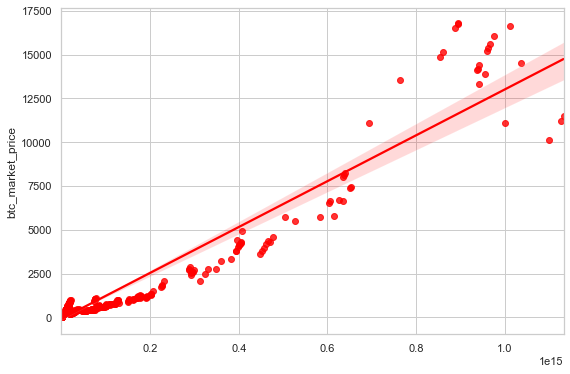

In [47]:
plt.figure(figsize= (9,6))
sns.regplot(Y_pred_net, Y_test, color= 'red')

In [48]:
plot_data = pd.DataFrame({'pred': Y_pred_net.flatten(), 'actual': Y_test})

In [49]:
plot_data

,pred,actual
1975,2.247775e+13,275.760000
350,7.981955e+09,0.840099
2726,3.592848e+14,3218.115017
953,2.165074e+11,12.460000
1617,1.704073e+13,622.010000
...,...,...
624,4.373930e+10,3.299000
641,3.400117e+10,2.499000
544,1.448879e+11,11.890000
2464,1.008401e+14,736.914375


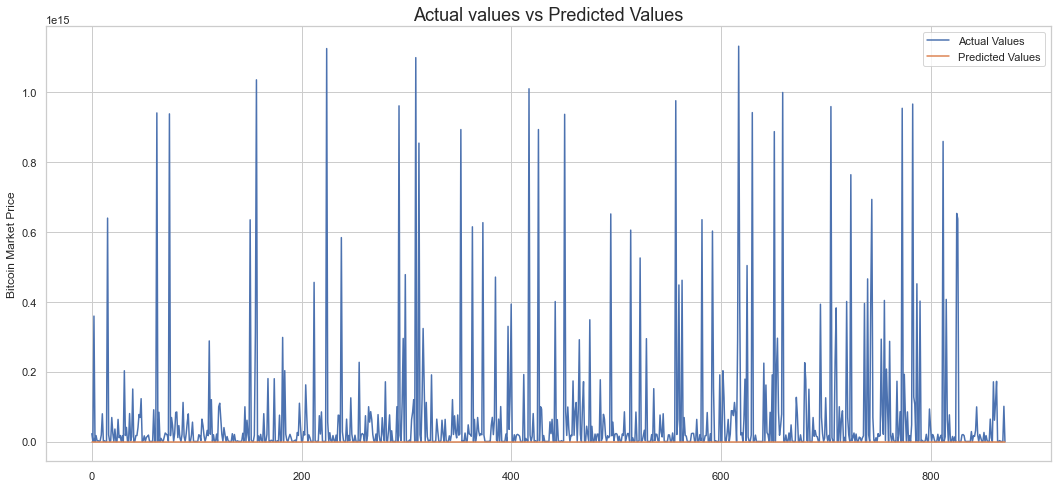

In [50]:
plt.figure(figsize = (18,8))
plt.plot(plot_data['pred'].tolist(), label= 'Actual Values')
plt.plot(plot_data['actual'].tolist(), label = 'Predicted Values')
plt.ylabel('Bitcoin Market Price')
plt.title("Actual values vs Predicted Values", fontsize= 18)
plt.legend()
plt.show()

# END